In [57]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from kneed import KneeLocator
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [68]:
csv_path="../Data/Data_iris.csv"
df=pd.read_csv(csv_path)
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,2
143,6.3,2.5,5.0,1.9,2
144,6.5,3.0,5.2,2.0,2
145,6.2,3.4,5.4,2.3,2


# Fitur

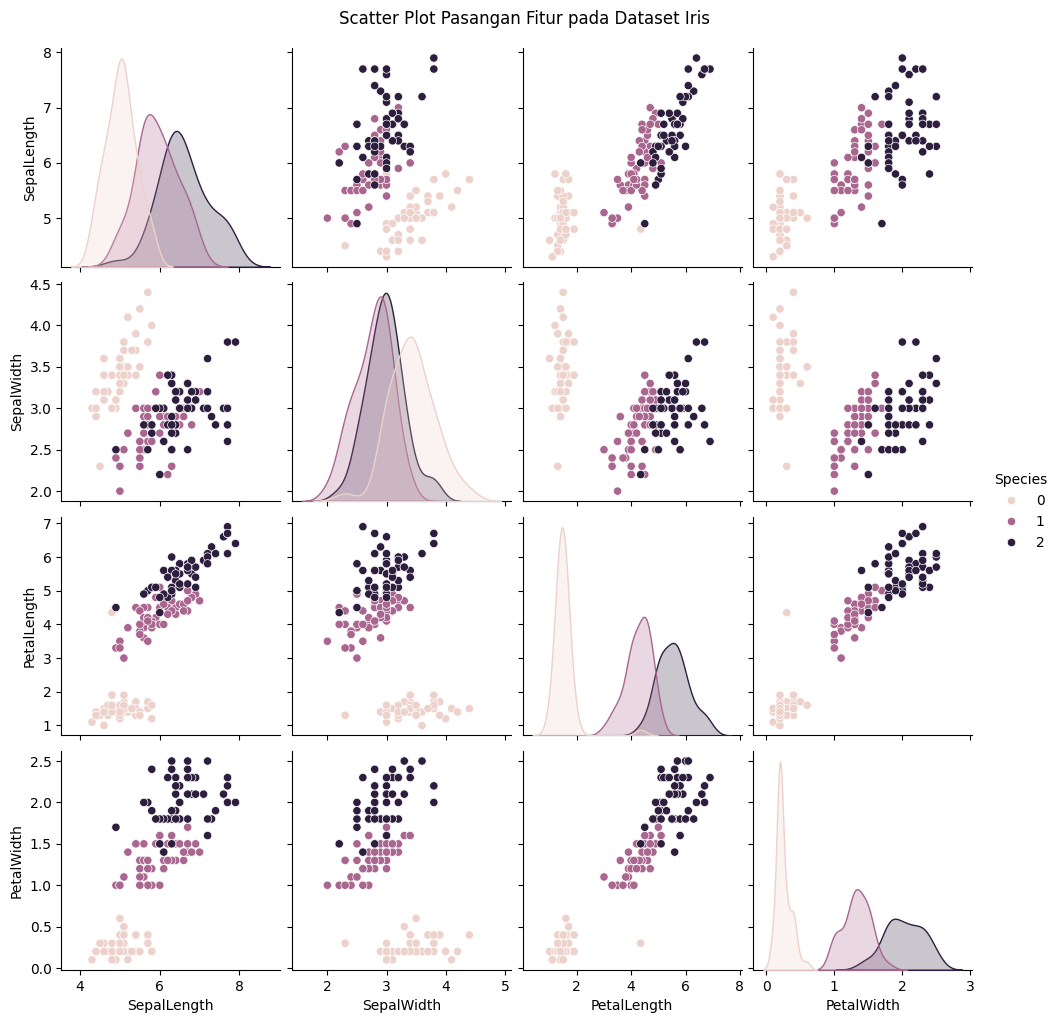

In [42]:
# Membuat scatter plot untuk pasangan fitur dengan seaborn
sns.pairplot(df, hue="Species")
plt.suptitle("Scatter Plot Pasangan Fitur pada Dataset Iris", y=1.02)  # Menambahkan judul dan menyesuaikan posisinya
plt.show()

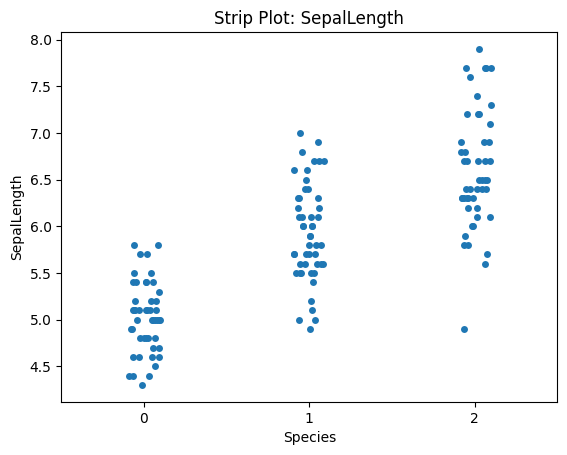

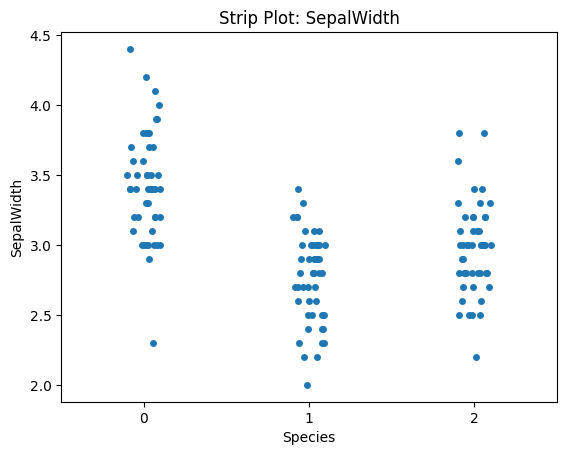

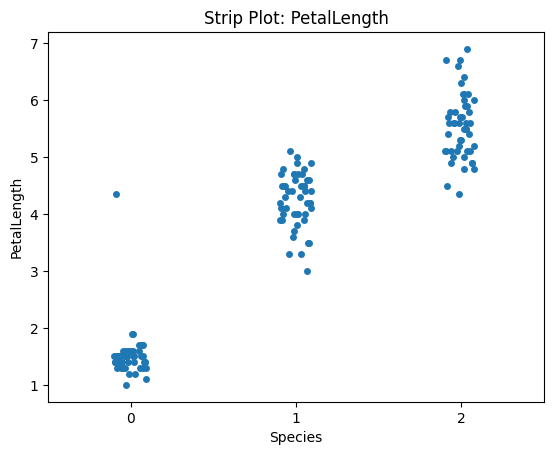

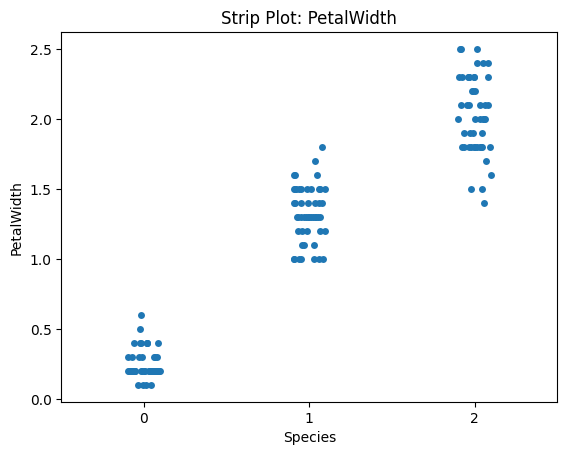

In [43]:
# StripPlot (masing-masing feature)
fitur = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']  # Menentukan fitur yang akan divisualisasikan
for feature in fitur:
    sns.stripplot(x='Species', y=feature, data=df)
    plt.title(f"Strip Plot: {feature}")
    plt.show()

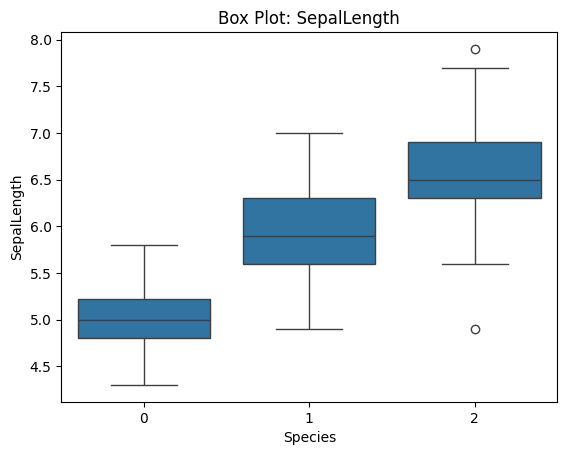

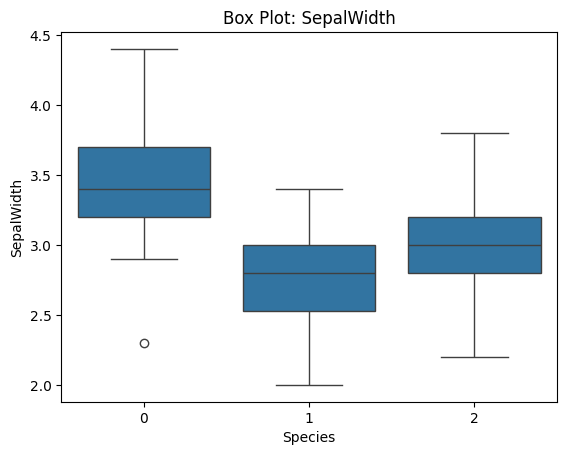

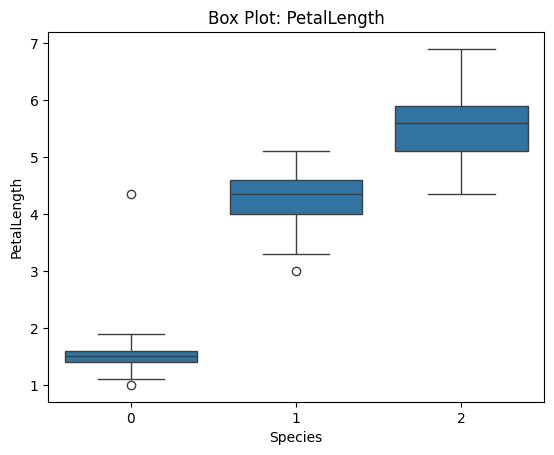

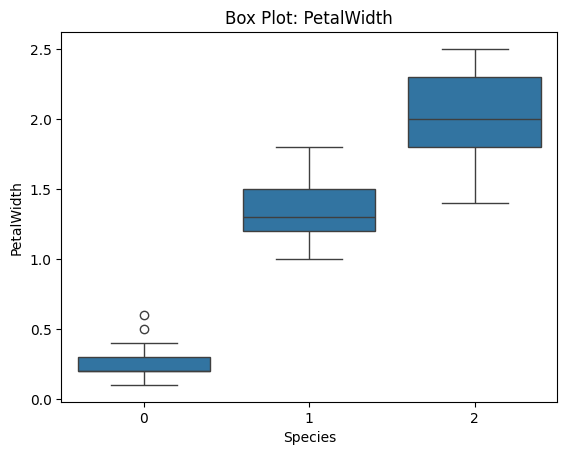

In [44]:
for feature in fitur:
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f"Box Plot: {feature}")
    plt.show()

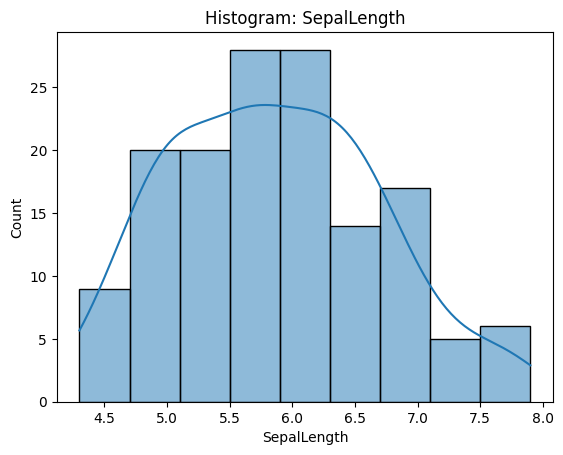

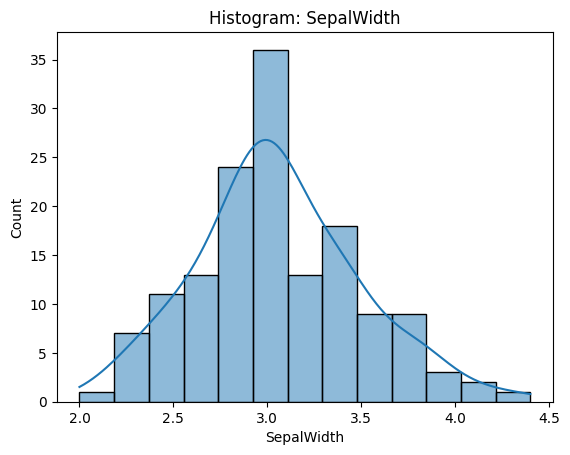

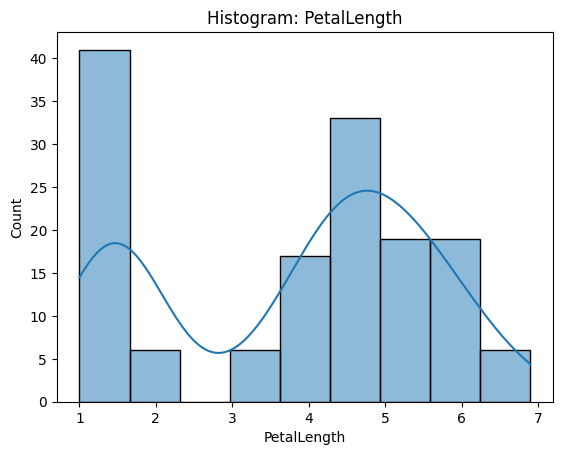

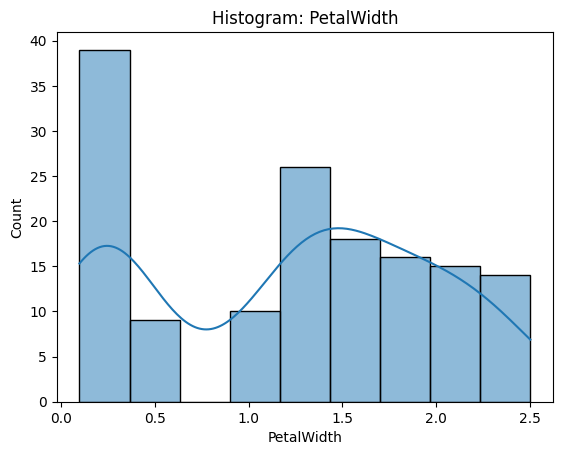

In [45]:
# Histogram (masing-masing feature)
for feature in fitur:
    sns.histplot(data=df, x=feature, kde=True)  # kde=True menambahkan estimasi kepadatan kernel
    plt.title(f"Histogram: {feature}")
    plt.show()

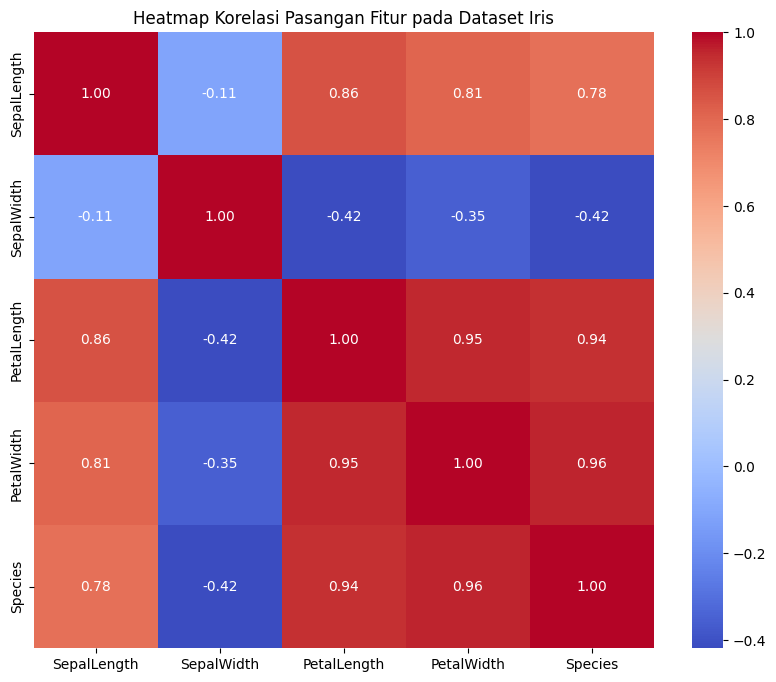

In [46]:
# Menghitung korelasi antar fitur
korelasi = df.corr()

# Membuat Heatmap untuk menampilkan korelasi antar fitur
plt.figure(figsize=(10, 8))  # Menyesuaikan ukuran gambar
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Pasangan Fitur pada Dataset Iris")
plt.show()

In [47]:
for feature in fitur:
    print(f"Frekuensi {feature}:")
    print(df[feature].value_counts())
    print("\n")

Frekuensi SepalLength:
SepalLength
5.1    9
6.3    9
5.0    9
5.7    8
6.7    8
5.8    7
5.5    7
6.4    7
5.4    6
6.1    6
6.0    6
5.6    6
4.8    5
6.5    5
4.9    4
6.2    4
7.7    4
6.9    4
4.6    4
5.2    4
5.9    3
4.4    3
7.2    3
6.8    3
6.6    2
4.7    2
7.6    1
7.4    1
7.3    1
7.0    1
7.1    1
5.3    1
4.3    1
4.5    1
7.9    1
Name: count, dtype: int64


Frekuensi SepalWidth:
SepalWidth
3.0    27
2.8    14
3.2    13
3.4    12
2.9    10
3.1     9
2.5     8
2.7     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: count, dtype: int64


Frekuensi PetalLength:
PetalLength
1.50    12
1.40    11
4.50     8
1.60     7
5.10     7
1.30     7
5.60     6
4.90     5
4.00     5
4.70     5
4.40     4
4.20     4
4.80     4
1.70     4
4.60     3
3.90     3
5.70     3
5.50     3
4.10     3
6.10     3
5.80     3
5.00     3
4.35     2
5.40     2
6.70     2
5.30     2
5.90     2

# KMeans

In [85]:
# Langkah 2: Inisialisasi model clustering (KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)

# Langkah 3: Implementasi forward feature selection
def forward_feature_selection(X, y, kmeans, max_features):
    best_features = set()
    remaining_features = set(X.columns)
    for _ in range(max_features):
        scores = []

        for feature in remaining_features:
            selected_features = best_features.union({feature})
            X_subset = X[list(selected_features)]  # Menggunakan list untuk mengakses kolom DataFrame
            kmeans.fit(X_subset)
            cluster_labels = kmeans.labels_
            score = silhouette_score(X_subset, cluster_labels)
            scores.append((score, feature))

        # Forward selection
        if scores:
            best_score, best_feature = max(scores)
            best_features.add(best_feature)
            remaining_features.remove(best_feature)

    return best_features

# Langkah 4: Lakukan forward feature selection
selected_features_forward = forward_feature_selection(X, y, kmeans, max_features=4)

# Langkah 5: Tampilkan fitur terpilih
print("Selected features (forward):", list(selected_features_forward))

# Langkah 6: Evaluasi model menggunakan fitur terpilih
X_selected_forward = X[list(selected_features_forward)]  # Menggunakan list untuk mengakses kolom DataFrame
X_train_forward, X_test_forward, y_train_forward, y_test_forward = train_test_split(X_selected_forward, y, test_size=0.2, random_state=42)

clf_forward = RandomForestClassifier(random_state=42)
clf_forward.fit(X_train_forward, y_train_forward)
accuracy_forward = clf_forward.score(X_test_forward, y_test_forward)
print("Accuracy with selected features (forward):", accuracy_forward)

Selected features (forward): ['PetalLength', 'SepalLength', 'SepalWidth', 'PetalWidth']
Accuracy with selected features (forward): 0.9333333333333333


In [92]:
# Langkah 2: Inisialisasi model clustering (KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)

# Langkah 3: Implementasi backward feature selection
def backward_feature_selection(X, y, kmeans, max_features):
    best_features = set(X.columns)
    for _ in range(max_features):
        scores = []

        for feature in best_features:
            remaining_features = best_features - {feature}
            X_subset = X[list(remaining_features)]  # Menggunakan list untuk mengakses kolom DataFrame
            kmeans.fit(X_subset)
            cluster_labels = kmeans.labels_
            score = silhouette_score(X_subset, cluster_labels)
            scores.append((score, feature))

        # Backward selection
        if scores:
            best_score, best_feature = max(scores)
            best_features.remove(best_feature)

    return best_features

# Langkah 4: Lakukan backward feature selection
selected_features_backward = backward_feature_selection(X, y, kmeans, max_features=3)

# Langkah 5: Tampilkan fitur terpilih
print("Selected features (backward):", list(selected_features_backward))

# Langkah 6: Evaluasi model menggunakan fitur terpilih
X_selected_backward = X[list(selected_features_backward)]  # Menggunakan list untuk mengakses kolom DataFrame
X_train_backward, X_test_backward, y_train_backward, y_test_backward = train_test_split(X_selected_backward, y, test_size=0.2, random_state=42)

clf_backward = RandomForestClassifier(random_state=42)
clf_backward.fit(X_train_backward, y_train_backward)
accuracy_backward = clf_backward.score(X_test_backward, y_test_backward)
print("Accuracy with selected features (backward):", accuracy_backward)

Selected features (backward): ['PetalWidth']
Accuracy with selected features (backward): 0.9666666666666667


# Hierarchical Clustering

In [88]:
from sklearn.cluster import AgglomerativeClustering

# Langkah 2: Inisialisasi model clustering (AgglomerativeClustering)
agg = AgglomerativeClustering(n_clusters=2)

# Langkah 3: Implementasi forward feature selection
def forward_feature_selection_hierarchical(X, y, agg, max_features):
    best_features = set()
    remaining_features = set(X.columns)
    for _ in range(max_features):
        scores = []

        for feature in remaining_features:
            selected_features = best_features.union({feature})
            X_subset = X[list(selected_features)]  # Menggunakan list untuk mengakses kolom DataFrame
            cluster_labels = agg.fit_predict(X_subset)
            score = silhouette_score(X_subset, cluster_labels)
            scores.append((score, feature))

        # Forward selection
        if scores:
            best_score, best_feature = max(scores)
            best_features.add(best_feature)
            remaining_features.remove(best_feature)

    return best_features

# Langkah 4: Lakukan forward feature selection
selected_features_forward_hierarchical = forward_feature_selection_hierarchical(X, y, agg, max_features=4)

# Langkah 5: Tampilkan fitur terpilih
print("Selected features (forward hierarchical):", list(selected_features_forward_hierarchical))

# Langkah 6: Evaluasi model menggunakan fitur terpilih
X_selected_forward_hierarchical = X[list(selected_features_forward_hierarchical)]  # Menggunakan list untuk mengakses kolom DataFrame
X_train_forward_hierarchical, X_test_forward_hierarchical, y_train_forward_hierarchical, y_test_forward_hierarchical = train_test_split(X_selected_forward_hierarchical, y, test_size=0.2, random_state=42)

clf_forward_hierarchical = RandomForestClassifier(random_state=42)
clf_forward_hierarchical.fit(X_train_forward_hierarchical, y_train_forward_hierarchical)
accuracy_forward_hierarchical = clf_forward_hierarchical.score(X_test_forward_hierarchical, y_test_forward_hierarchical)
print("Accuracy with selected features (forward hierarchical):", accuracy_forward_hierarchical)

Selected features (forward hierarchical): ['SepalLength', 'PetalWidth', 'SepalWidth', 'PetalLength']
Accuracy with selected features (forward hierarchical): 0.9333333333333333


In [90]:
# Langkah 2: Inisialisasi model clustering (AgglomerativeClustering)
agg = AgglomerativeClustering(n_clusters=2)

# Langkah 3: Implementasi backward feature selection
def backward_feature_selection_hierarchical(X, y, agg, max_features):
    best_features = set(X.columns)
    for _ in range(max_features):
        scores = []

        for feature in best_features:
            remaining_features = best_features - {feature}
            X_subset = X[list(remaining_features)]  # Menggunakan list untuk mengakses kolom DataFrame
            cluster_labels = agg.fit_predict(X_subset)
            score = silhouette_score(X_subset, cluster_labels)
            scores.append((score, feature))

        # Backward selection
        if scores:
            best_score, best_feature = max(scores)
            best_features.remove(best_feature)

    return best_features

# Langkah 4: Lakukan backward feature selection
selected_features_backward_hierarchical = backward_feature_selection_hierarchical(X, y, agg, max_features=3)

# Langkah 5: Tampilkan fitur terpilih
print("Selected features (backward hierarchical):", list(selected_features_backward_hierarchical))

# Langkah 6: Evaluasi model menggunakan fitur terpilih
X_selected_backward_hierarchical = X[list(selected_features_backward_hierarchical)]  # Menggunakan list untuk mengakses kolom DataFrame
X_train_backward_hierarchical, X_test_backward_hierarchical, y_train_backward_hierarchical, y_test_backward_hierarchical = train_test_split(X_selected_backward_hierarchical, y, test_size=0.2, random_state=42)

clf_backward_hierarchical = RandomForestClassifier(random_state=42)
clf_backward_hierarchical.fit(X_train_backward_hierarchical, y_train_backward_hierarchical)
accuracy_backward_hierarchical = clf_backward_hierarchical.score(X_test_backward_hierarchical, y_test_backward_hierarchical)
print("Accuracy with selected features (backward hierarchical):", accuracy_backward_hierarchical)

Selected features (backward hierarchical): ['PetalLength']
Accuracy with selected features (backward hierarchical): 0.8666666666666667
